In [2]:
%run functions.ipynb

In [140]:
mc = pd.read_csv('mc.csv')
modules = pd.read_csv('modules_views-66769.csv')

/opt/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
mc.head()

,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,...,simplecertificate,videogallery,choicegroup,scheduler,vpl,obs,poster,feedback,journal,offlinequiz
0,5,https://edisciplinas.usp.br/course/view.php?id=5,3,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,https://edisciplinas.usp.br/course/view.php?id=6,5,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,85,https://edisciplinas.usp.br/course/view.php?id=85,2,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,99,https://edisciplinas.usp.br/course/view.php?id=99,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,408,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
mc['ano'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018])

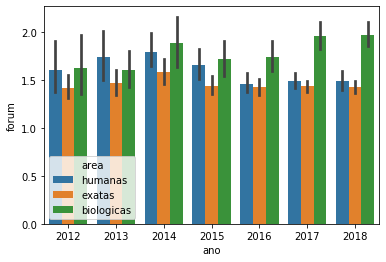

In [58]:
sns.barplot(x='ano', y='forum', hue='area', data=mc)

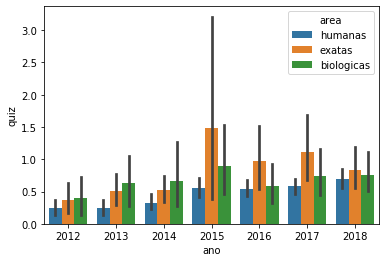

In [49]:
sns.barplot(x='ano', y='quiz', hue='area', data=mc)

50.89895757132407 49.41350566638569 -0.030061657939579822


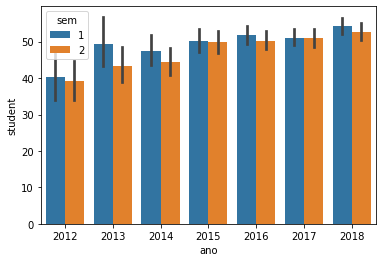

In [141]:
sns.barplot(x='ano', y='student', hue='sem', data=mc)
g1 = sum(mc[mc['sem'] == 1].groupby('fullname')['student'].count())
h1 = sum(mc[mc['sem'] == 1].groupby('fullname')['student'].sum())
t1 = h1/g1
g2 = sum(mc[mc['sem'] == 2].groupby('fullname')['student'].count())
h2 = sum(mc[mc['sem'] == 2].groupby('fullname')['student'].sum())
t2 = h2/g2
print(t1, t2, 1 - t1/t2)

In [144]:
modules.head()

,Unnamed: 0,course,name,cmid,views,uniqusers,courseid,vpu,students,teachers,ups,vps
0,0,66769,forum,2474267,1288.0,142.0,66769.0,9.070423,179,9,0.793296,7.195531
1,1,66769,quiz,2474311,32.0,3.0,66769.0,10.666667,179,9,0.016760,0.178771
2,2,66769,questionnaire,2474312,20.0,3.0,66769.0,6.666667,179,9,0.016760,0.111732
3,3,66769,label,2474313,0.0,0.0,0.0,0.000000,179,9,0.000000,0.000000
4,4,66769,label,2474314,0.0,0.0,0.0,0.000000,179,9,0.000000,0.000000


In [162]:
modules['uniqueview'] = modules['uniqusers']/modules['views']
df = modules.set_index('name')
df.head()

,Unnamed: 0,course,cmid,views,uniqusers,courseid,vpu,students,teachers,ups,vps,uniqueview
name,,,,,,,,,,,,
forum,0,66769,2474267,1288.0,142.0,66769.0,9.070423,179,9,0.793296,7.195531,0.110248
quiz,1,66769,2474311,32.0,3.0,66769.0,10.666667,179,9,0.016760,0.178771,0.093750
questionnaire,2,66769,2474312,20.0,3.0,66769.0,6.666667,179,9,0.016760,0.111732,0.150000
label,3,66769,2474313,0.0,0.0,0.0,0.000000,179,9,0.000000,0.000000,NaN
label,4,66769,2474314,0.0,0.0,0.0,0.000000,179,9,0.000000,0.000000,NaN


In [222]:
df = df.replace(np.NaN,0)
gd = df[df['uniqueview'] > 0.05]
gd['name'] = gd.index
gd.head()

/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,course,cmid,views,uniqusers,courseid,vpu,students,teachers,ups,vps,uniqueview,name
name,,,,,,,,,,,,,
forum,0,66769,2474267,1288.0,142.0,66769.0,9.070423,179,9,0.793296,7.195531,0.110248,forum
quiz,1,66769,2474311,32.0,3.0,66769.0,10.666667,179,9,0.016760,0.178771,0.093750,quiz
questionnaire,2,66769,2474312,20.0,3.0,66769.0,6.666667,179,9,0.016760,0.111732,0.150000,questionnaire
quiz,10,66769,2474326,1704.0,152.0,66769.0,11.210526,179,9,0.849162,9.519553,0.089202,quiz
resource,11,66769,2474327,156.0,82.0,66769.0,1.902439,179,9,0.458101,0.871508,0.525641,resource


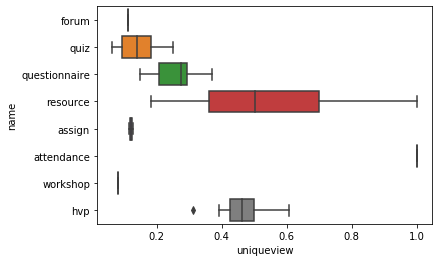

In [224]:
sns.boxplot(x = 'uniqueview', y = 'name', data = gd)

In [241]:
plt.subplots(figsize=(20,15))
pl = sns.distplot(mc[mc['student'] < 250]['student'])
pl.fig.set_figheight(8.27)

AttributeError: 'AxesSubplot' object has no attribute 'subplots'